In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [111]:
df = pd.read_csv('/content/waze_dataset.csv')

In [112]:
df.shape

(14999, 13)

In [62]:
df.isna().sum()
df['device'] = pd.Categorical(df['device']).codes

In [63]:
df

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,0
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,1
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,0
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,1
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,1
14995,14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,0
14996,14996,retained,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,1
14997,14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,1


In [64]:
X = df.drop(columns=['label'])
y = df['label']
X_labeled = X[y.notna()]
y_labeled = y[y.notna()]
X_unlabeled = X[y.isna()]

In [65]:
scaler = StandardScaler()
X_labeled_scaled = scaler.fit_transform(X_labeled)
X_unlabeled_scaled = scaler.transform(X_unlabeled)

In [66]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_labeled_scaled, y_labeled)

KNeighborsClassifier()

In [67]:
# Predict the missing labels for unlabeled data
y_unlabeled_pred = knn.predict(X_unlabeled_scaled)

# Combine the results back into the original dataset
df.loc[y.isna(), 'label'] = y_unlabeled_pred

In [68]:
df.isna().sum()

,0
ID,0
label,0
sessions,0
drives,0
total_sessions,0
n_days_after_onboarding,0
total_navigations_fav1,0
total_navigations_fav2,0
driven_km_drives,0
duration_minutes_drives,0


In [69]:
df['label'].value_counts().sort_values(ascending=False)

,count
label,
retained,12421
churned,2578


In [70]:
df = df.drop(columns=['ID'])

In [71]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,0.644843
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,0.478577
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,0.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,1.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,1.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,1.000000


<Axes: >

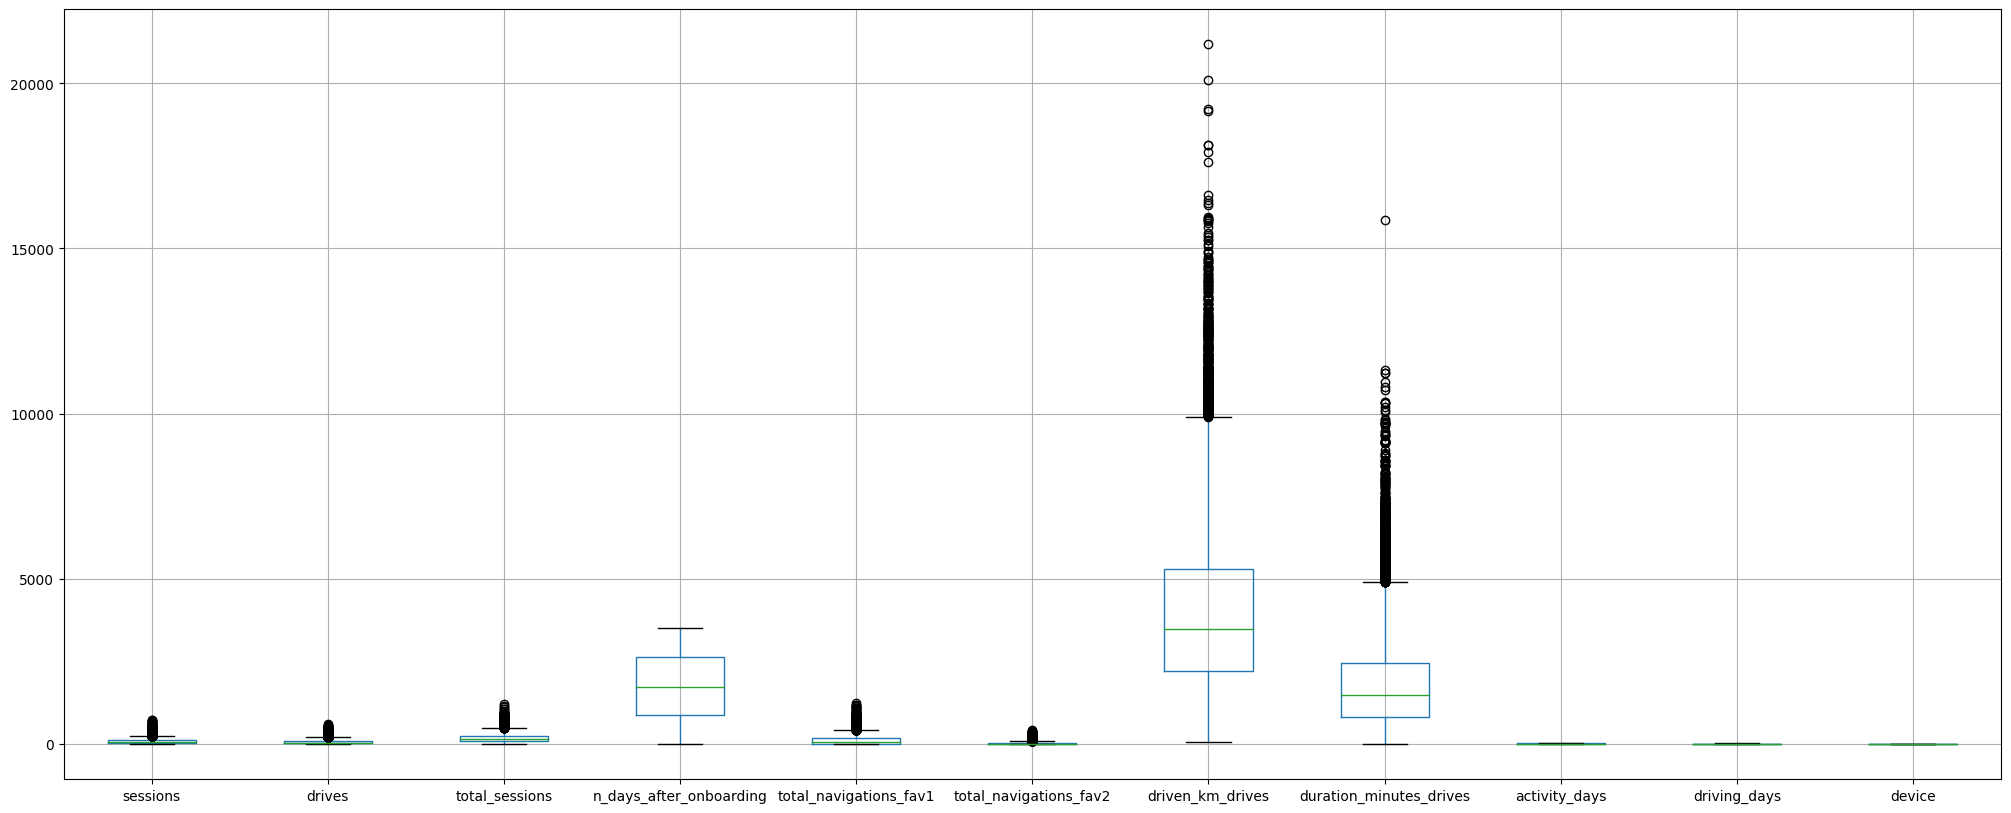

In [72]:
df.boxplot(figsize=(25,10))

array([[<Axes: title={'center': 'sessions'}>,
        <Axes: title={'center': 'drives'}>,
        <Axes: title={'center': 'total_sessions'}>],
       [<Axes: title={'center': 'n_days_after_onboarding'}>,
        <Axes: title={'center': 'total_navigations_fav1'}>,
        <Axes: title={'center': 'total_navigations_fav2'}>],
       [<Axes: title={'center': 'driven_km_drives'}>,
        <Axes: title={'center': 'duration_minutes_drives'}>,
        <Axes: title={'center': 'activity_days'}>],
       [<Axes: title={'center': 'driving_days'}>,
        <Axes: title={'center': 'device'}>, <Axes: >]], dtype=object)

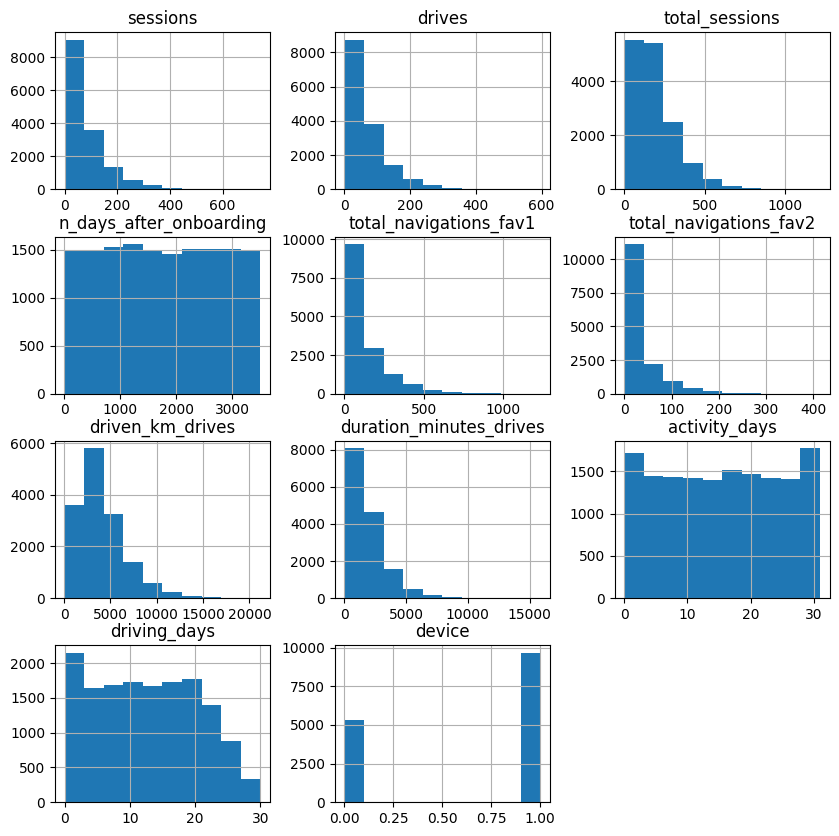

In [73]:
df.hist(figsize=(10,10))

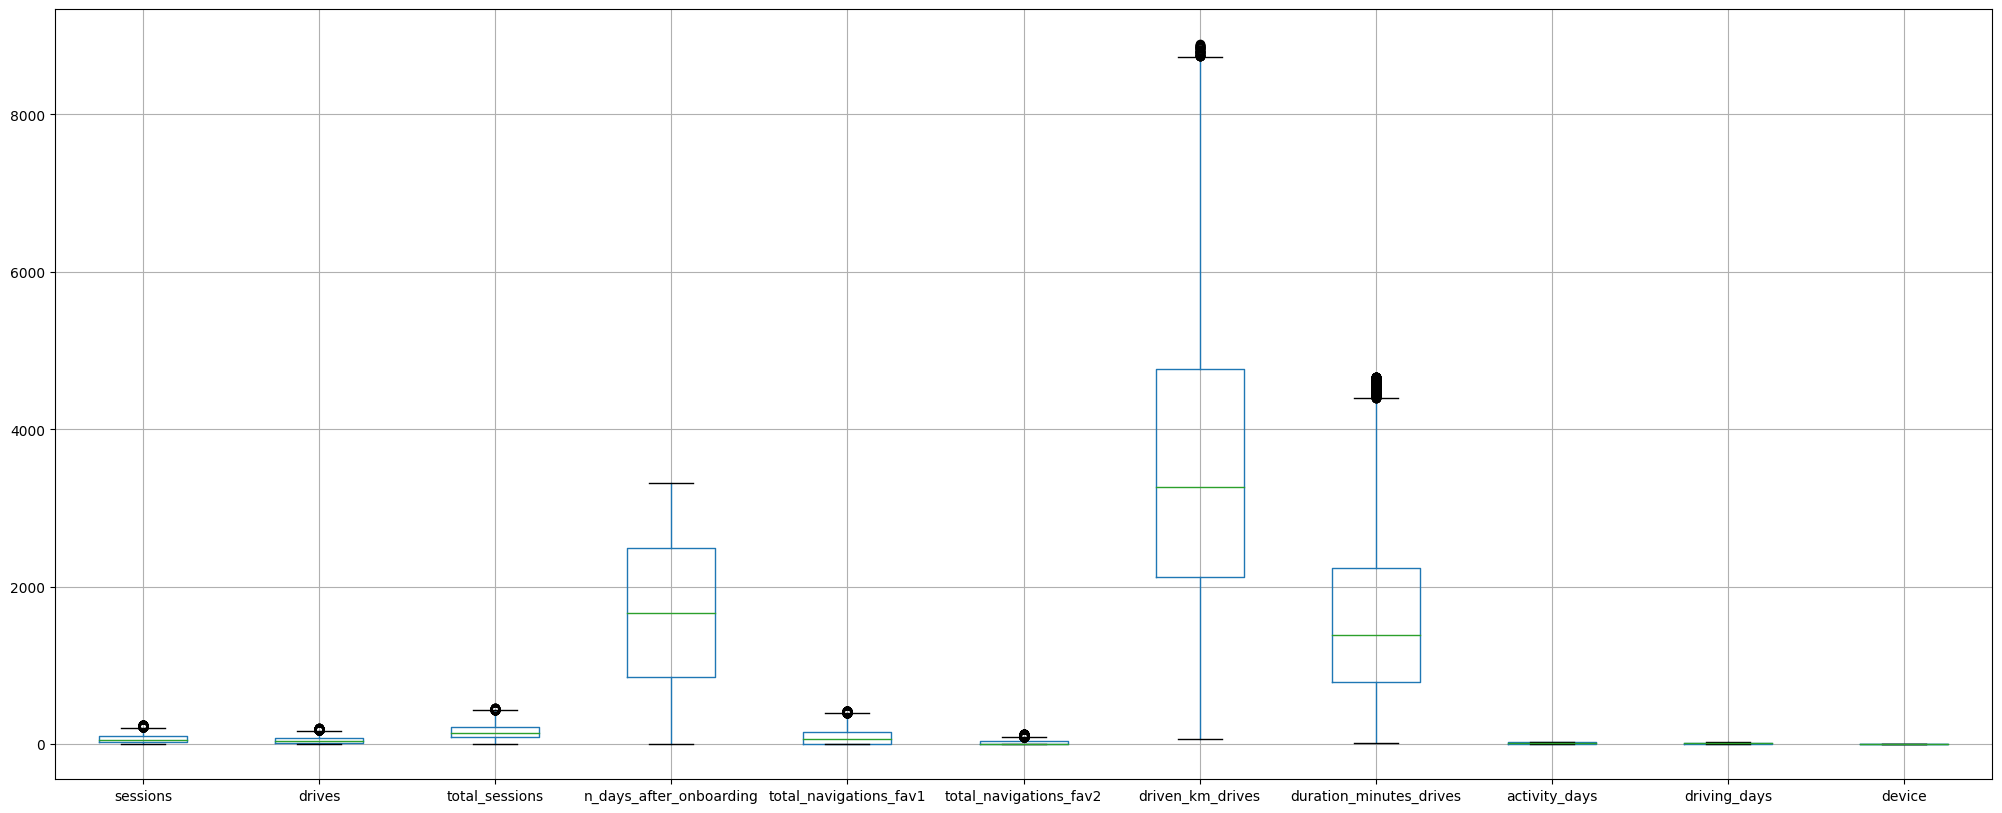

In [74]:
df1 = df.drop(columns=['label'])
df2 = df['label']
percentiles_99 = df1.quantile(0.95)

# Filter out records where values exceed the 99th percentile in any column
df_filtered = df1[(df1 <= percentiles_99).all(axis=1)]

df_filtered.boxplot(figsize=(25,10))
df_filtered.shape
df = df_filtered
df['label'] = df2


In [75]:
df

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,label
2,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,0,retained
3,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,1,retained
4,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,0,retained
5,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,1,retained
6,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,1,retained
...,...,...,...,...,...,...,...,...,...,...,...,...
14991,50,41,102.444592,1463,0,121,4094.536313,2201.984210,4,2,1,churned
14992,112,90,267.040136,1283,14,0,1525.932143,1116.650478,5,5,1,retained
14994,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,1,retained
14995,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,0,retained


<Axes: >

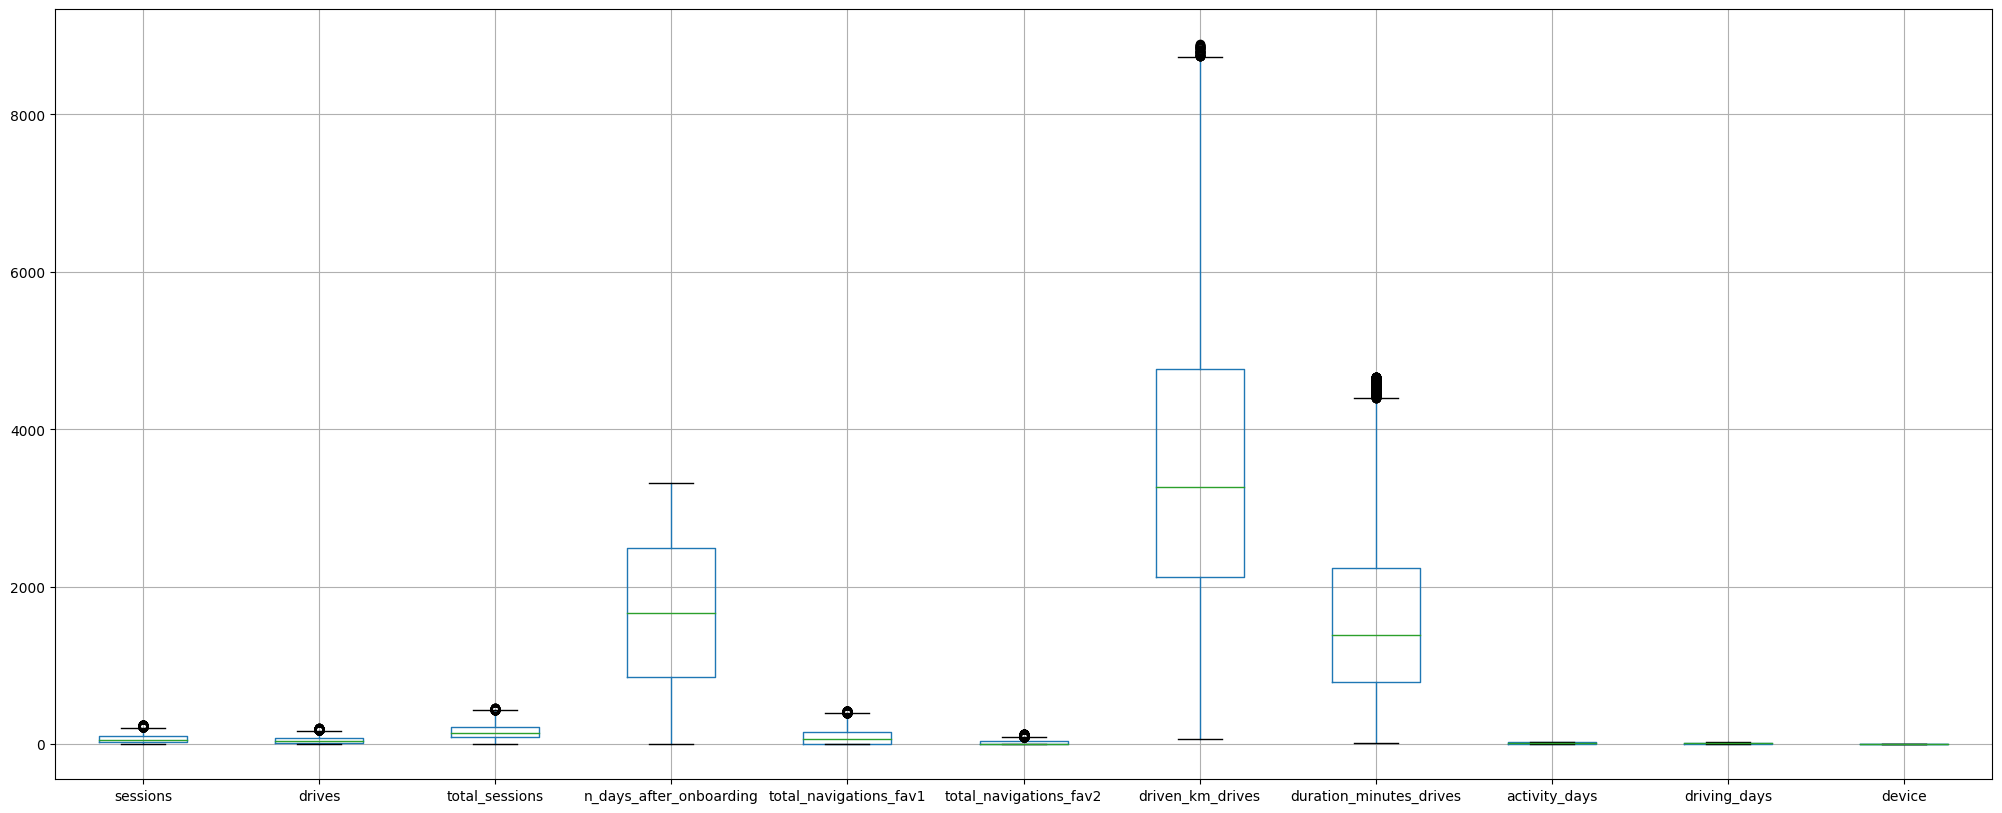

In [76]:
df.boxplot(figsize=(25,10))

array([[<Axes: title={'center': 'sessions'}>,
        <Axes: title={'center': 'drives'}>,
        <Axes: title={'center': 'total_sessions'}>],
       [<Axes: title={'center': 'n_days_after_onboarding'}>,
        <Axes: title={'center': 'total_navigations_fav1'}>,
        <Axes: title={'center': 'total_navigations_fav2'}>],
       [<Axes: title={'center': 'driven_km_drives'}>,
        <Axes: title={'center': 'duration_minutes_drives'}>,
        <Axes: title={'center': 'activity_days'}>],
       [<Axes: title={'center': 'driving_days'}>,
        <Axes: title={'center': 'device'}>, <Axes: >]], dtype=object)

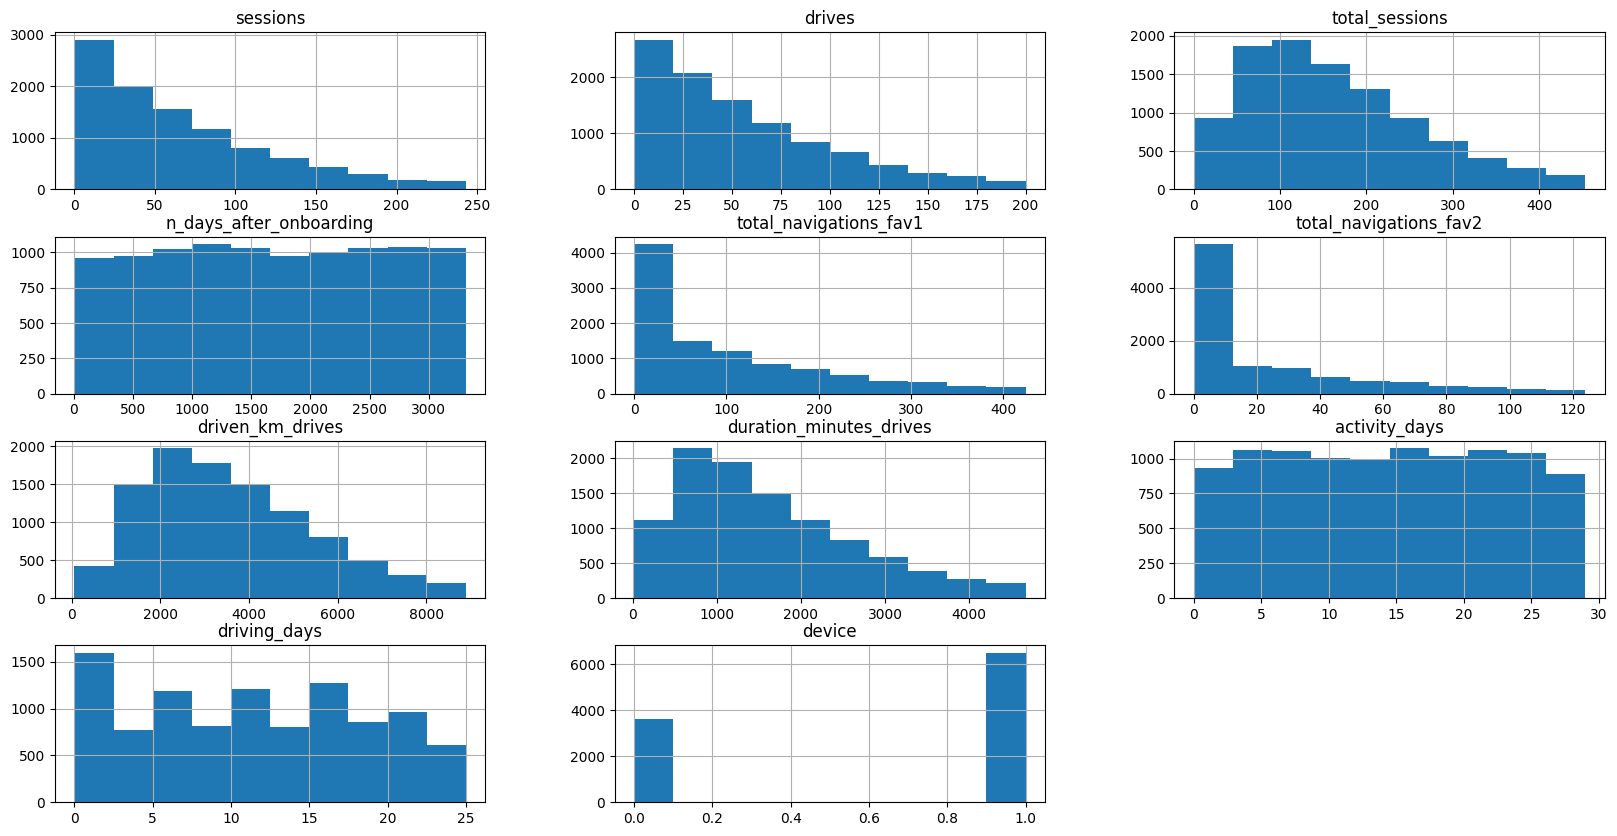

In [77]:
df.hist(figsize=(20,10))

In [78]:
df = df.dropna()
df['label'] = pd.Categorical(df['label']).codes

In [79]:
df['label'].value_counts().sort_values(ascending=False)

,count
label,
1,8352
0,1765


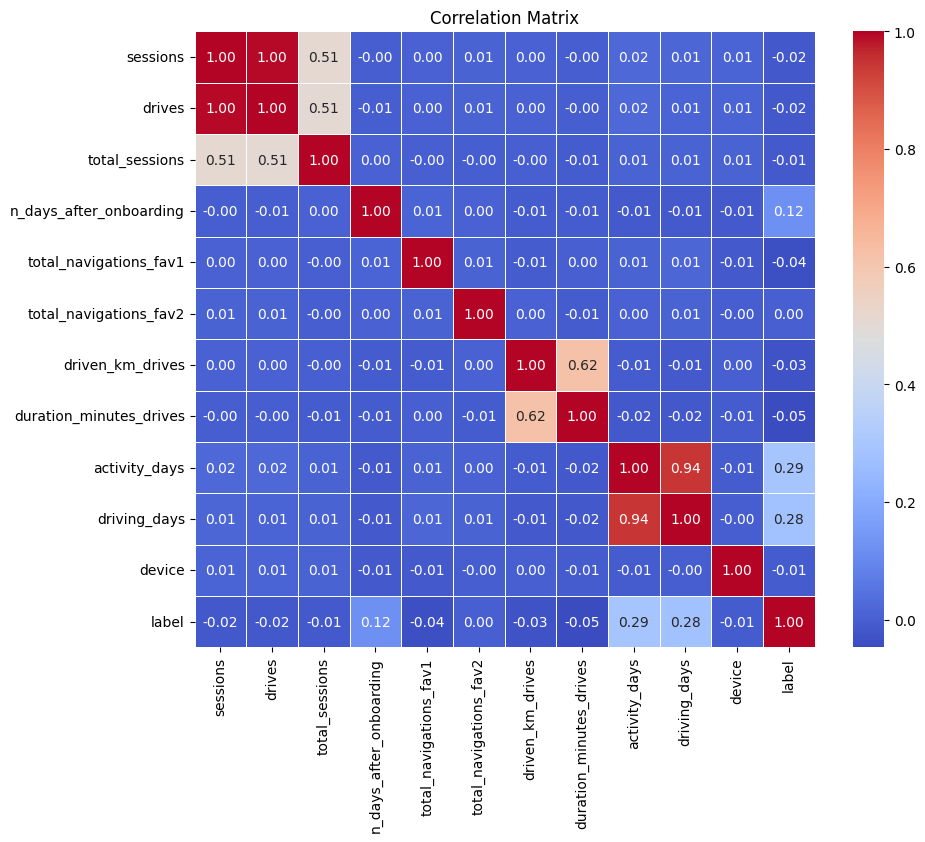

In [80]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Optional: To adjust the size of the figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [95]:
X = df.drop(columns=['label'])
X = X.drop(columns=['device'])
y = df['label']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
count_class_0, count_class_1 = np.bincount(y_train)
scale_pos_weight = count_class_0 / count_class_1

# Create the XGBoost model
model = XGBClassifier(
    objective='binary:logistic',   # Binary classification
    scale_pos_weight=scale_pos_weight,  # Adjust for class imbalance
    eval_metric='logloss'  ,        # Suppress warning
    use_label_encoder=False,
    random_state=42,
    max_depth=10,
    n_estimators=1000,
    learning_rate=0.001
)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_resampled, y_resampled, cv=stratified_kfold, scoring='recall_weighted')

print("Cross-Validation Recall: ", scores.mean())
print("\n")
# Fit the model on the resampled dataset
model.fit(X_resampled, y_resampled)


Cross-Validation Recall:  0.6135276532137518




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.001, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [98]:
y_pred = model.predict(X_test)
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Recall: 0.23826714801444043
Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.95      0.35       362
           1       0.95      0.24      0.38      1662

    accuracy                           0.37      2024
   macro avg       0.58      0.59      0.36      2024
weighted avg       0.82      0.37      0.38      2024



In [99]:
def preprocessing_df(df):
  df['device'] = pd.Categorical(df['device']).codes
  df = df.drop(columns=['ID'])
  df = df.dropna()
  df1 = df.drop(columns=['label'])
  df2 = df['label']
  percentiles_99 = df1.quantile(0.95)
  # Filter out records where values exceed the 99th percentile in any column
  df_filtered = df1[(df1 <= percentiles_99).all(axis=1)]
  df = df_filtered
  df['label'] = df2
  df = df.drop(columns=['device'])
  df = df.dropna()
  df['label'] = pd.Categorical(df['label']).codes
  return df

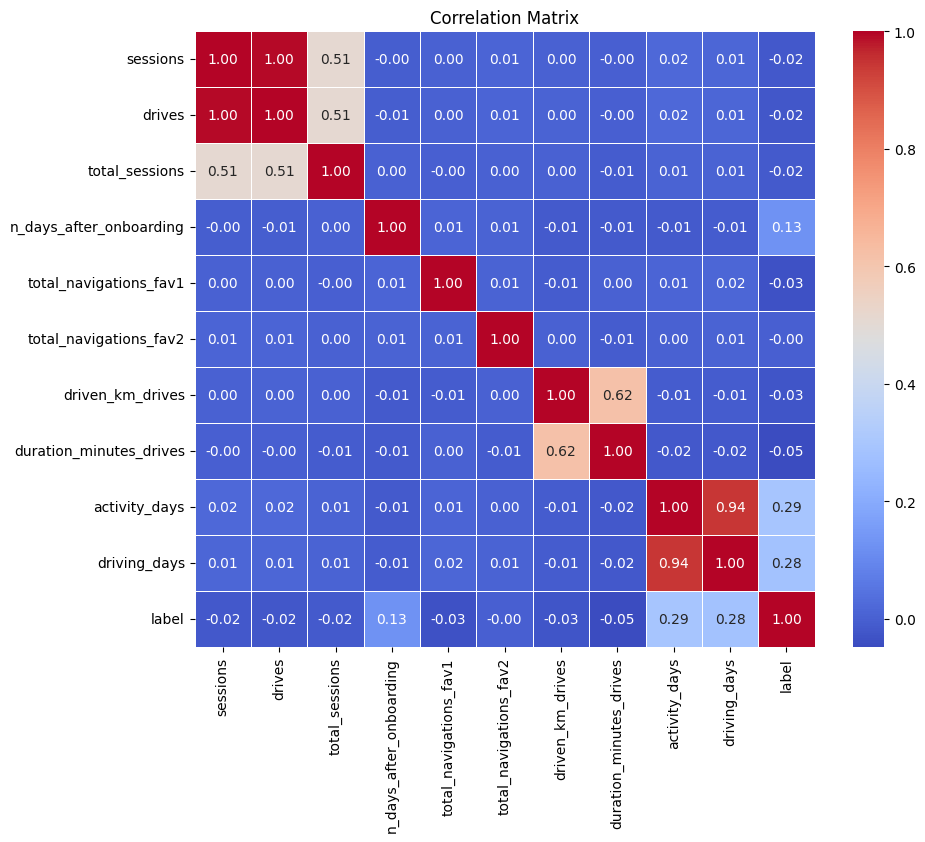

In [100]:
df3 = pd.read_csv('/content/waze_dataset.csv')
df3 = preprocessing_df(df3)
corr_matrix = df3.corr()
plt.figure(figsize=(10, 8))  # Optional: To adjust the size of the figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [101]:
X3 = df3.drop(columns=['label'])
y3 = df3['label']
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [102]:
y_pred = model.predict(X_test)
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Recall: 0.2631578947368421
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.99      0.36       337
           1       1.00      0.26      0.42      1596

    accuracy                           0.39      1933
   macro avg       0.61      0.63      0.39      1933
weighted avg       0.86      0.39      0.41      1933



In [107]:
df3.columns

Index(['sessions', 'drives', 'total_sessions', 'n_days_after_onboarding',
       'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives',
       'duration_minutes_drives', 'activity_days', 'driving_days', 'label'],
      dtype='object')

In [108]:
df.columns

Index(['sessions', 'drives', 'total_sessions', 'n_days_after_onboarding',
       'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives',
       'duration_minutes_drives', 'activity_days', 'driving_days', 'device',
       'label'],
      dtype='object')

In [109]:
import pickle

with open('Churn_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('preprocessing.pkl', 'wb') as f:
    pickle.dump(preprocessing_df, f)

In [110]:
from google.colab import files
files.download('Churn_model.pkl')
files.download('preprocessing.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>